 <img src="https://eant.tech/imagenes/logo.png" width=25% height=80%  >

## <img src="http://icons.iconarchive.com/icons/cornmanthe3rd/plex/256/Other-python-icon.png" width="40"> Ejercicio Properati

**Properati.com** es un nuevo portal web que presta servicios de compra, venta y alquiler de inmuebles en América Latina. Este portal libera los datos que ellos tienen sobre propiedades en los paises en los cual ellos desarrollan actividades comerciales.


<center>

<img src="https://d3oky698b3gnfy.cloudfront.net/assets/img/isologo-properati.svg" alt="25746" border="0" width="50%" height="30%">
</center>



🏷️ 1. Importar los paquetes que vamos a utilizar.
> * pandas [`pd`]
> * seaborn [`sns`]
> * matplotlib.pyplot [`plt`]
> * numpy [`np`]


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

🏷️ 2. Importar el dataframe de properati

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [20]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ar_properati_sample.csv", sep = ",", header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,7,8,9,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,NaN,id,lat,lon,pais,provincia,partido,ambientes,superficie_total,precio,moneda,tipo_prop,tipo_operacion,fecha_ini,fecha_fin,creacion,localidad,habitaciones,baños,superficie_cubierta,periodo_pago
1,0.0,gKORqH/4a1GKVnz5ShdCnA==,-34.65429688,-58.73831558,Argentina,Bs.As. G.B.A. Zona Oeste,Merlo,2.0,280.0,17000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-09,2020-06-21,Merlo,NaN,2.0,120.0,NaN
2,1.0,ONwGxcJxznN0vzY24WIitA==,-34.44532394,-58.97518158,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,140.0,32000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-21,2020-06-21,NaN,NaN,2.0,130.0,NaN
3,2.0,j+Q/e0JM7odiRA++CP9qEA==,-34.52194214,-58.49274063,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,3.0,225.0,54000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-17,2020-06-21,NaN,NaN,2.0,150.0,NaN
4,3.0,NRntKJlAtTVxxGu1KUWjGQ==,-34.55987549,-58.56618118,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,3.0,300.0,20000.0,ARS,Casa,Alquiler,2020-06-21,2020-06-23,2020-06-21,Villa Ballester,NaN,1.0,200.0,NaN


In [23]:
new_header = df.iloc[0]
df = df[1:] 
df.columns = new_header

In [25]:
df.head()

,NaN,id,lat,lon,pais,provincia,partido,ambientes,superficie_total,precio,moneda,tipo_prop,tipo_operacion,fecha_ini,fecha_fin,creacion,localidad,habitaciones,baños,superficie_cubierta,periodo_pago
1,0.0,gKORqH/4a1GKVnz5ShdCnA==,-34.65429688,-58.73831558,Argentina,Bs.As. G.B.A. Zona Oeste,Merlo,2.0,280.0,17000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-09,2020-06-21,Merlo,NaN,2.0,120.0,NaN
2,1.0,ONwGxcJxznN0vzY24WIitA==,-34.44532394,-58.97518158,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,140.0,32000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-21,2020-06-21,NaN,NaN,2.0,130.0,NaN
3,2.0,j+Q/e0JM7odiRA++CP9qEA==,-34.52194214,-58.49274063,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,3.0,225.0,54000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-17,2020-06-21,NaN,NaN,2.0,150.0,NaN
4,3.0,NRntKJlAtTVxxGu1KUWjGQ==,-34.55987549,-58.56618118,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,3.0,300.0,20000.0,ARS,Casa,Alquiler,2020-06-21,2020-06-23,2020-06-21,Villa Ballester,NaN,1.0,200.0,NaN
5,4.0,ebfgCc/SI6lHoJCmxW0tCA==,-34.567634399999996,-58.542189799999996,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,5.0,320.0,35000.0,ARS,Casa,Alquiler,2020-06-21,2020-06-23,2020-06-21,San Andres,NaN,NaN,250.0,Mensual


🏷️ 3. Generar un dataframe que contenga los alquileres que esten en moneda pesos.

In [14]:
df_alquiler_pesos = df.loc[(df.moneda.isin({'ARS'})) & (df.tipo_operacion.isin({'Alquiler'}))]

In [16]:
df_alquiler_pesos.head()

,NaN,id,lat,lon,pais,provincia,partido,ambientes,superficie_total,precio,moneda,tipo_prop,tipo_operacion,fecha_ini,fecha_fin,creacion,localidad,habitaciones,baños,superficie_cubierta,periodo_pago
1,0.0,gKORqH/4a1GKVnz5ShdCnA==,-34.65429688,-58.73831558,Argentina,Bs.As. G.B.A. Zona Oeste,Merlo,2.0,280.0,17000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-09,2020-06-21,Merlo,NaN,2.0,120.0,NaN
2,1.0,ONwGxcJxznN0vzY24WIitA==,-34.44532394,-58.97518158,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,140.0,32000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-21,2020-06-21,NaN,NaN,2.0,130.0,NaN
3,2.0,j+Q/e0JM7odiRA++CP9qEA==,-34.52194214,-58.49274063,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,3.0,225.0,54000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-17,2020-06-21,NaN,NaN,2.0,150.0,NaN
4,3.0,NRntKJlAtTVxxGu1KUWjGQ==,-34.55987549,-58.56618118,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,3.0,300.0,20000.0,ARS,Casa,Alquiler,2020-06-21,2020-06-23,2020-06-21,Villa Ballester,NaN,1.0,200.0,NaN
5,4.0,ebfgCc/SI6lHoJCmxW0tCA==,-34.567634399999996,-58.542189799999996,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,5.0,320.0,35000.0,ARS,Casa,Alquiler,2020-06-21,2020-06-23,2020-06-21,San Andres,NaN,NaN,250.0,Mensual


🏷️ 4.Realizar un gráfico por tipo de propiedad

In [29]:
df['tipo_prop'].value_counts().head(5)

Departamento       178708
Casa                46276
PH                  15657
Oficina              3583
Local comercial      2768
Name: tipo_prop, dtype: int64

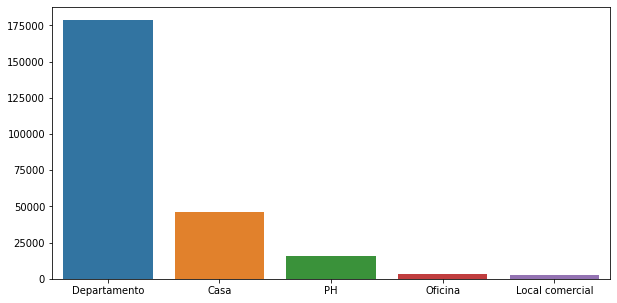

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x = df['tipo_prop'].value_counts().head(5).index,
            y = df['tipo_prop'].value_counts().head(5).values)
plt.show()

🏷️ 5. Realizar un gráfico por tipo de propiedad y tipo de alquiler

In [36]:
df['tipo_operacion'].value_counts().head(5)

Venta                177221
Alquiler              59465
Alquiler temporal     13969
Name: tipo_operacion, dtype: int64

In [41]:
df_tipo_alquiler = df.loc[(df.tipo_operacion.isin({'Alquiler','Alquiler temporal'}))]

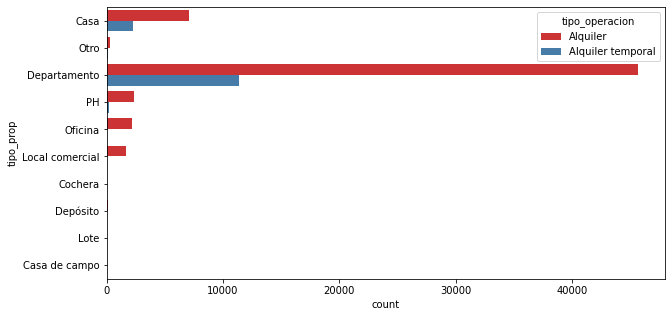

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_tipo_alquiler,
              y = 'tipo_prop',
              #order = tips["day"].value_counts().index,
              palette = "Set1",
              hue = "tipo_operacion")
plt.show()

🏷️ 6. Realizar un scatterplot donde en el eje x se visualice la superficie total y en el eje y el precio del alquiler

In [54]:
df_tipo_alquiler_float = df_tipo_alquiler.astype({"superficie_total": float, "precio": float})

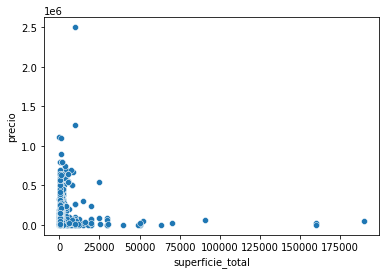

In [55]:
sns.scatterplot(
                x = df_tipo_alquiler_float["superficie_total"],
                y = df_tipo_alquiler_float["precio"]
                )

🏷️ 7. Realizar el mismo gráfico pero filtrando la superficie total para las propiedades que tengan entre 0 y 500 metros cuadrados.

In [56]:
df_tipo_alquiler_float_0500 = df_tipo_alquiler_float.loc[(df_tipo_alquiler_float["superficie_total"] > 0) & (df_tipo_alquiler_float["superficie_total"] < 500)]

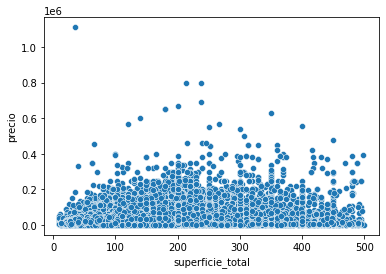

In [57]:
sns.scatterplot(
                x = df_tipo_alquiler_float_0500["superficie_total"],
                y = df_tipo_alquiler_float_0500["precio"]
                )

🏷️ 8. Modifique el gráfico anterior para visualizar en diferentes colores los tipos de propiedad.

In [61]:
df_tipo_alquiler_float

,NaN,id,lat,lon,pais,provincia,partido,ambientes,superficie_total,precio,moneda,tipo_prop,tipo_operacion,fecha_ini,fecha_fin,creacion,localidad,habitaciones,baños,superficie_cubierta,periodo_pago
1,0.0,gKORqH/4a1GKVnz5ShdCnA==,-34.65429688,-58.73831558,Argentina,Bs.As. G.B.A. Zona Oeste,Merlo,2.0,280.0,17000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-09,2020-06-21,Merlo,NaN,2.0,120.0,NaN
2,1.0,ONwGxcJxznN0vzY24WIitA==,-34.44532394,-58.97518158,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,140.0,32000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-21,2020-06-21,NaN,NaN,2.0,130.0,NaN
3,2.0,j+Q/e0JM7odiRA++CP9qEA==,-34.52194214,-58.49274063,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,3.0,225.0,54000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-17,2020-06-21,NaN,NaN,2.0,150.0,NaN
4,3.0,NRntKJlAtTVxxGu1KUWjGQ==,-34.55987549,-58.56618118,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,3.0,300.0,20000.0,ARS,Casa,Alquiler,2020-06-21,2020-06-23,2020-06-21,Villa Ballester,NaN,1.0,200.0,NaN
5,4.0,ebfgCc/SI6lHoJCmxW0tCA==,-34.567634399999996,-58.542189799999996,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,5.0,320.0,35000.0,ARS,Casa,Alquiler,2020-06-21,2020-06-23,2020-06-21,San Andres,NaN,NaN,250.0,Mensual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250616,250615.0,qviyqsT4HQJMEzRT1iMebw==,-34.6503,-58.6239,Argentina,Bs.As. G.B.A. Zona Oeste,Morón,4,170.0,40000.0,ARS,Oficina,Alquiler,2020-02-21,2020-09-23,2020-02-21,Morón,NaN,4,170,NaN
250620,250619.0,5BT85VxTHUF8UyezymqwcA==,-34.5755,-58.4194,Argentina,Capital Federal,Palermo,4,238.0,3000.0,USD,Departamento,Alquiler,2020-02-21,2020-02-22,2020-02-21,NaN,3,4,238,NaN
250627,250626.0,OiFTbd1IfVxF2rvurtPkJw==,-34.5643,-58.4355,Argentina,Capital Federal,Belgrano,4,230.0,2500.0,USD,Departamento,Alquiler,2020-02-21,2020-02-22,2020-02-21,NaN,2,4,200,NaN
250633,250632.0,LmnZqV2tx7BADp2eBf8YqQ==,-34.4349,-58.8308,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4,261.0,55000.0,ARS,Casa,Alquiler,2020-02-21,2020-03-02,2020-02-21,NaN,3,4,196,Mensual


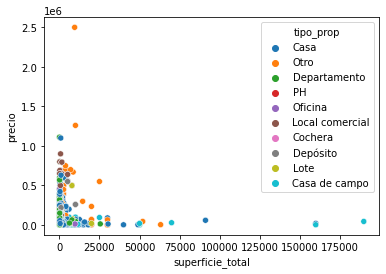

In [62]:
sns.scatterplot(data = df_tipo_alquiler_float,
                x = "superficie_total",
                y = "precio",
                hue = "tipo_prop"
                )

🏷️ 9. Genere una variable denominada comuna en la cual tenga tres datos posibles:
* **Comuna 1 :** barrios de Retiro, San Nicolás, Puerto Madero, San Telmo,Monserrat y Constitución.

* **Comuna 3:** Balvanera y San Cristóbal

* **Otros:** para el resto de los barrios

In [63]:
df.head()

,NaN,id,lat,lon,pais,provincia,partido,ambientes,superficie_total,precio,moneda,tipo_prop,tipo_operacion,fecha_ini,fecha_fin,creacion,localidad,habitaciones,baños,superficie_cubierta,periodo_pago
1,0.0,gKORqH/4a1GKVnz5ShdCnA==,-34.65429688,-58.73831558,Argentina,Bs.As. G.B.A. Zona Oeste,Merlo,2.0,280.0,17000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-09,2020-06-21,Merlo,NaN,2.0,120.0,NaN
2,1.0,ONwGxcJxznN0vzY24WIitA==,-34.44532394,-58.97518158,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,140.0,32000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-21,2020-06-21,NaN,NaN,2.0,130.0,NaN
3,2.0,j+Q/e0JM7odiRA++CP9qEA==,-34.52194214,-58.49274063,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,3.0,225.0,54000.0,ARS,Casa,Alquiler,2020-06-21,2020-07-17,2020-06-21,NaN,NaN,2.0,150.0,NaN
4,3.0,NRntKJlAtTVxxGu1KUWjGQ==,-34.55987549,-58.56618118,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,3.0,300.0,20000.0,ARS,Casa,Alquiler,2020-06-21,2020-06-23,2020-06-21,Villa Ballester,NaN,1.0,200.0,NaN
5,4.0,ebfgCc/SI6lHoJCmxW0tCA==,-34.567634399999996,-58.542189799999996,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín,5.0,320.0,35000.0,ARS,Casa,Alquiler,2020-06-21,2020-06-23,2020-06-21,San Andres,NaN,NaN,250.0,Mensual


In [64]:
df["localidad"].value_counts()

Nordelta                          5253
La Plata                          3929
Palermo Hollywood                 2705
Olivos                            2366
Palermo Chico                     2028
                                  ... 
Country Los Rosales                  1
Villa Numancia                       1
Azul                                 1
Colina de Peralta Ramos              1
Barrio Cerrado "Pilar Privado"       1
Name: localidad, Length: 681, dtype: int64

In [65]:
df['comuna'] = np.where(df.localidad.isin({"Retiro", "San Nicolás", "Puerto Madero", "San Telmo","Monserrat", "Constitución"}),"Comuna 1","Otros")

In [66]:
df['comuna'] = np.where(df.localidad.isin({"Balvanera","San Cristóbal"}),"Comuna 3","Otros")

In [67]:
#Verificar, el resultado no parece ser correcto
df['comuna'].value_counts()

Otros    250655
Name: comuna, dtype: int64

🏷️ 10. Genere un scatterplot en el cual el eje x es la superficie total y el eje y los precios, asimismo asigne colores para visualizar la variable comuna (la misma fue generada en el paso anterior).
Los colores deben ser:
* comuna 1: rojo, 
* comuna 3: verde y 
* el resto en color naranja.

🏷️ 11. Genere un gráfico para ver la distribución de los ambientes.

🏷️ 12. Genere una variable denominada "amb_desc" en la cual si la propiedad tiene mas de 5 ambientes colocar 6, de lo contrario mantener el valor que actualmente poseen.

🏷️ 13. Realice un gráfico para ver la cantidad de propiedades en base a la variable generada en el paso anterior.



🏷️ 14. Modifique el scatterplot generado en el ejercicio nro 10, y en este nuevo grafico realice mosaicos por la variable "amb_desc", esto significa que debe tener 6 gráficos como resultado.

🏷️ 15. Modifique el gráfico anterior para poder visualizar por fila solo 3 gráficos.

🏷️ 16. Generar un lineplot en donde se visualice en el eje x el año y en el eje y la frecuencia.
Asimismo debe tomar un color para el año 2020 y otro para el 2019.

🏷️ 17. Genere un gráfico a partir del metodo countplot en el cual se visualicen los 10 barrios con más propuedades.
En el mismo las barras deben estar ordenada en forma decreciente.

🏷️ Cual es el barrio que más propiedades tiene?

* [x] Palermo
* [ ] Retiro
* [ ] Caballito


🏷️ 18. Modificar el gráfico anterior para visualizar la cantidad de ambientes por cada uno de los 10 barrios.
**Pista:** Utilice la variable "amb_desc"

🏷️ 19. Generar un boxplot para ver la distribución de los precios por tipo de propiedad en los 10 barrios con más propiedades

🏷️ 20. Generar un boxplot por tipo de propiedad para ver la distribución de los precios para los 10 barrios con más propiedades.
Adicionalmente modifique la paleta de colores, en el siguiente link puede ver cuales son las disponibles:
https://seaborn.pydata.org/tutorial/color_palettes.html



🏷️ 21. Modificar el gráfico realizado en el paso anterior para que no se vean los outliers.

🏷️ 22. Modificar el gráfico realizado en el paso anterior para que sea un violinplot sin outliers, y adicionalmente agregar un split por tipo de operación.

🏷️ 23. Generar un heatmap tomando las variables amb_desc y barrios, el mismo debe tomar el conjunto de datos que tiene los alquileres para los 10 barrios con más propiedades.
Utilizar como función: "count".

🏷️ 24. Generar un heatmap tomando las variables amb_desc y barrios, el mismo debe tomar el conjunto de datos que tiene los alquileres para los 10 barrios con más propiedades.

Utilizar como función la media para los precios.

🏷️ 25. Agregar al gráfico generado en el paso anterior el parametro normalize='index', Que diferencia puede observar?